# Word Embeddings (incrustaciones de palabradas) - NLP

Las incrustaciones de palabras son un tipo de representación de palabras que permite que las palabras con un significado similar tengan una representación similar. Son una representación distribuida de texto que es quizás uno de los avances clave para el impresionante desempeño de los métodos de aprendizaje profundo en los desafiantes problemas de procesamiento del lenguaje natural.


Las incrustaciones de palabras son, de hecho, una clase de técnicas en las que las palabras individuales se representan como vectores de valor real en un espacio vectorial predefinido. Cada palabra se asigna a un vector y los valores del vector se aprenden de una manera que se asemeja a una red neuronal y, por lo tanto, la técnica a menudo se agrupa en el campo del aprendizaje profundo.

La clave del enfoque es la idea de utilizar una representación distribuida densa para cada palabra.

Cada palabra está representada por un vector de valor real, a menudo decenas o cientos de dimensiones. Esto contrasta con las miles o millones de dimensiones necesarias para las representaciones de palabras dispersas, como una codificación one-hot.

Parte de la visión de TensorFlow de hacer el aprendizaje de la máquina y el aprendizaje profundo más fácil de aprender y más fácil de usar, es el concepto de tener conjuntos de datos incorporados.Ampliando esto, hay una biblioteca llamada TensorFlow Data Services o TFTS para abreviar, y que contiene muchos conjuntos de datos y muchas categorías diferentes. Aquí hay algunos ejemplos; y mientras que podemos ver que hay muchos conjuntos de datos diferentes para diferentes tipos, en particular basados en imágenes, también hay unos pocos para el texto, y vamos a utilizar el conjunto de datos de las revisiones del IMDB a continuación. Este conjunto de datos es ideal porque contiene un gran cuerpo de textos, 50.000 reseñas de películas que se clasifican como positivas o negativas. Fue escrito por Andrew Mass y otros en Stanford

Usando herramientas y TensorFlow, puedes procesar cadenas para obtener índices de todas las palabras en un corpus de cadenas y luego convertir las cadenas en matrices de números. Este es el comienzo de obtener el sentimiento de sus oraciones.

Así que a partir de ahí, ¿cómo se puede conseguir un sentimiento? Bueno, eso es algo que se puede aprender de un corpus de palabras de la misma manera que los rasgos fueron extraídos de las imágenes. Este proceso se llama incrustación, con la idea de que las palabras y las palabras asociadas se agrupan como vectores en un espacio multidimensional.

## 1. Conjunto de Datos 

Este es un conjunto de datos para la clasificación de sentimiento binario . Ofrecemos un conjunto de 25.000 reseñas de películas muy polares para entrenamiento y 25.000 para pruebas. También hay datos adicionales sin etiquetar para su uso. Se proporcionan formatos de texto sin procesar y bolsa de palabras ya procesada. Consulte el archivo README incluido en la versión para obtener más detalles.  http://ai.stanford.edu/~amaas/data/sentiment/

## 2. Importamos las bibliotecas

Ahora, puedes importar los conjuntos de datos de TensorFlow, y en este caso los llamo tfds. Con revisiones imdb, ahora puedo llamar tfds.load, pasarle la cadena de revisiones imdb, y devolverá los datos de imdb, y los metadatos sobre él con este código. Los datos se dividen en 25.000 muestras para entrenamiento y 25.000 muestras para pruebas. Puedo dividirlos así. Cada una de ellas son iterables que contienen las 25.000 frases y etiquetas respectivas como tensores

In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteR7JSHT/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteR7JSHT/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteR7JSHT/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Cada una de ellas son iterables que contienen las 25.000 frases y etiquetas respectivas como tensores. Hasta este punto, hemos estado usando los tokenizadores y las herramientas de relleno de Cara en matrices de frases, así que tenemos que hacer un poco de conversión. Lo haremos así. En primer lugar, vamos a definir las listas que contienen las frases y etiquetas para los datos de entrenamiento y de prueba. Ahora, puedo iterar sobre los datos de entrenamiento extrayendo las frases y las etiquetas. Los valores de s e l son tensores, por lo que llamando a su método NumPy, extraeré su valor. Luego haré lo mismo para el conjunto de pruebas

In [ ]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

A continuación, haremos una ficha con nuestras frases. Aquí está el código. He puesto los hiperparámetros en la parte superior, así, para que sea más fácil cambiarlos y editarlos, en lugar de hacer un phishing a través de secuencias de funciones para los literales y luego cambiarlos. Ahora, como antes, importamos el tokenizer y las secuencias del pad.

Crearemos una instancia de tokenizer, dándole nuestro tamaño de vocabulario y nuestro token de vocabulario deseado. Ahora vamos a ajustar el tokenizer en nuestro conjunto de datos de entrenamiento. Una vez que tengamos nuestro índice de palabras, podemos reemplazar las cadenas que contienen las palabras con el valor del token que creamos para ellas. Esta será la lista llamada secuencias. Como antes, las frases tendrán una longitud variable. Así que rellenaremos y/o truncaremos las frases secuenciadas hasta que todas tengan la misma longitud, determinada por el parámetro de longitud máxima (max_length). Luego haremos lo mismo para las secuencias de prueba. Tengan en cuenta que el índice de palabras son palabras que se derivan del conjunto de entrenamiento, así que deben esperar ver mucho más de las fichas de vocabulario en el examen de prueba. Ahora es el momento de definir nuestra red neuronal. Esto debería parecer muy familiar a estas alturas, excepto quizás por esta línea, la incrustación. Esta es la clave para el análisis de los sentimientos de texto en TensorFlow, y aquí es donde la magia realmente ocurre.


In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
print(testing_padded)

[[  11  772 1498 ...   56   46  214]
 [  25 5401    3 ...  962    1    1]
 [   2  190   13 ...   18 1163 1017]
 ...
 [   6  104   86 ...   60  514  544]
 [   0    0    0 ...   53   71  222]
 [   0    0    0 ...  448 8608 2127]]


Así que ahora si importo mi tokenizador  de preprocesamiento de keras TensorFlow, y las secuencias del pad están en secuencia como antes. Instanciaré mi tokenizador pasándole mi tamaño de vocabulario, que como dije aquí antes fue de 10.000. Por supuesto que puedes cambiar eso. Entonces mi ficha de vocabulario exterior, el tokenizer se ajustará a las frases de entrenamiento, no a las frases de prueba, sólo a las de entrenamiento. Si quiero ver el índice de palabras para el tokenizer, todos tienen que decir **tokenizer.word_index**. Entonces convertiré mis oraciones en secuencias de números, siendo el número el valor y la palabra la clave que se sacaron de las oraciones de entrenamiento cuando hice el ajuste en el texto, y eso me dará ahora mi lista de números enteros por oración. Si quiero acolcharlos o truncarlos, uso secuencias de acolchados para hacerlo. Así que cada una de mis oraciones es ahora una lista de números. De nuevo, esos números son los valores en un par de valores clave, donde la clave, por supuesto, es la palabra. Las secuencias del teclado asegurarán que todas tengan la misma longitud, que en este caso es de 120 palabras o 120 números. Se rellenará o se truncará para adaptarse. Voy a hacer lo mismo con las secuencias de prueba, y voy a rellenarlas de la misma manera. Tengan en cuenta que las secuencias de prueba son simbólicas basadas en el índice de palabras que se aprendió de las palabras de entrenamiento. Así que puede encontrar muchos más OOVs, en la secuencia de prueba de lo que tendría en la secuencia de entrenamiento, porque habrá muchas palabras que no ha encontrado. Pero eso es lo que hace que sea una buena prueba, porque más tarde si vas a probar una revisión, quieres ser capaz de hacerlo para ver cómo lo hará con palabras que el tokenizador o la red neuronal no ha visto anteriormente. Así que ahora ejecutaré este código. Crearé mis secuencias, mis secuencias acolchadas, mis secuencias de prueba, mis patrones de prueba

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


Así que ahora puedo explorar cómo se ve esto ejecutando este bloque de código. Por ejemplo, aquí pueden ver que acabo de tomar mi índice de palabras al revés, y puedo decodificar mi revisión echando un vistazo a los números de esa revisión e invertirla en una palabra. Así que tomando la clave de ese valor y el índice de palabras invertido se invierte el par de valores clave. Así que podemos ver aquí que la revisión decodificada, esto es lo que se alimentaría. Vi esta película sobre películas verdaderas, que automáticamente me sacó del vocabulario y del texto original. Se puede ver como mayúsculas, hay puntuación como corchetes y comas allí, y la palabra escéptico terminó no siendo uno de los primeros 1.000 que se utilizó. Así que nos da una buena forma de ver el tipo de datos que vamos a introducir en la red neuronal.


Así que ahora echemos un vistazo a la red neuronal en sí, y es muy simple. Es sólo una secuencia. La capa superior de esto va a ser una incrustación, la incrustación va a ser mi tamaño de vocabulario, las dimensiones de incrustación que quería usar, había especificado 16. Mi longitud de entrada para eso es 120, que es la longitud máxima de las revisiones. Así que la salida de la incrustación será aplanada, que luego pasará a una capa densa, que es de seis neuronas y luego pasará a una capa final con una activación sigmoidea y sólo una neurona, porque sé que sólo tengo dos clases. Sólo voy a hacer una neurona en lugar de dos. No necesitaba codificarlo. Sólo voy a hacer una neurona y mi función de activación siendo un sigmoide, lo empujará a cero o a uno respectivamente

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


Entonces puedo compilar eso y echar un vistazo al resumen. Aquí está el resumen, todo se ve bien. De nuevo, cada una de mis frases, 120 caracteres, mi incrustación tiene 16, y de esa cosa aplanada tendremos 1.920 valores. Se alimentan en la densidad. Se alimentan en la capa de salida.

Así que entrenémoslo. Así que voy a establecer sólo para 10 épocas y voy a ajustarlo. Así que es entrenar, es correcto, 25.000 muestras y validar en 25.000 muestras. Veamos el entrenamiento. Nuestra precisión comienza en un 74% en el conjunto de entrenamiento, 85 en la validación. El entrenamiento con el tiempo va a subir muy bien. Es muy probable que nos estemos excediendo en esto, porque nuestra precisión es muy alta, pero incluso esa precisión de validación no es mala. Está en los 80.

In [ ]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 0.4848 - accuracy: 0.7511 - val_loss: 0.3568 - val_accuracy: 0.8428
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2356 - accuracy: 0.9098 - val_loss: 0.3692 - val_accuracy: 0.8395
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0864 - accuracy: 0.9782 - val_loss: 0.4602 - val_accuracy: 0.8259
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0205 - accuracy: 0.9973 - val_loss: 0.5435 - val_accuracy: 0.8256
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0049 - accuracy: 0.9997 - val_loss: 0.5960 - val_accuracy: 0.8270
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6456 - val_accuracy: 0.8278
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 9.4031e-04 - accuracy: 1.0000 - val_loss: 0.6819 - val_accuracy: 0.8295
Ep

Así que podemos ver incluso para la séptima época nuestra precisión hasta un uno. Nuestra precisión de validación está todavía en los bajos 80, 81, 82 por ciento. Bastante bien, pero esta clara sobrecarga que se está produciendo. Así que cuando llegué a mi última época, la precisión de mi entrenamiento era del 100 por ciento, mi precisión de validación del 83 por ciento. Es bastante saludable, pero estoy seguro de que podríamos hacerlo mejor. 




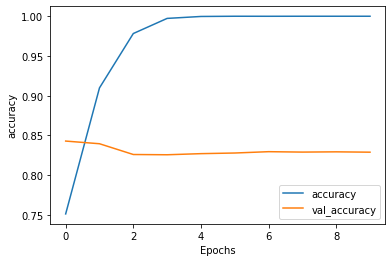

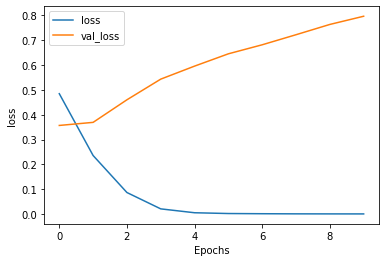

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Así que ahora vamos a ver lo que vamos a hacer para ver esto en el proyector de incrustación. En primer lugar, voy a tomar el resultado de mi incrustación, que fue modelado en la capa cero, y podemos ver que había 10.000 palabras posibles y tenía 16 dimensiones. Aquí es donde voy a iterar a través de esa matriz para sacar las 16 dimensiones, los valores de las 16 dimensiones por palabra y escribir eso como out_V, que es mi **vectores.tsv**. Entonces la palabra real asociada con eso se escribirá como out_M, que es mi **meta.tsv**. Así que si lo ejecuto, hará su truco y si estás ejecutando en Colab este pedazo de código, me permitirá descargar esos archivos. Así que tomará un momento y se descargarán. Ahí están, vecs.tsv y meta.tsv

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]


Así que si ahora me acerco al proyector de incrustación, http://projector.tensorflow.org/ vemos que se muestra ahora mismo el Word2Vec 10K. Así que si me desplazo hasta aquí y digo cargar datos, elegiré el archivo, tomaré el vecs.tsv. Elegiré archivo. Tomaré el meta.tsv, y luego lo cargaré. Hago clic afuera y ahora veo esto. Pero si esfero los datos, puedes ver que están agrupados así. Necesitamos mejorarlo un poco pero podemos empezar a ver que las palabras se han agrupado tanto en lo positivo como en lo negativo.Puedo ver, hay muchas palabras que se divierten en ellas, algunas positivas, otras negativas.Así que espero que este sea un buen ejemplo de cómo puedes empezar a mapear palabras en espacios de vectores, y cómo puedes empezar a mirar el sentimiento e incluso visualizar cómo tu modelo ha aprendido el sentimiento de estos conjuntos de palabras

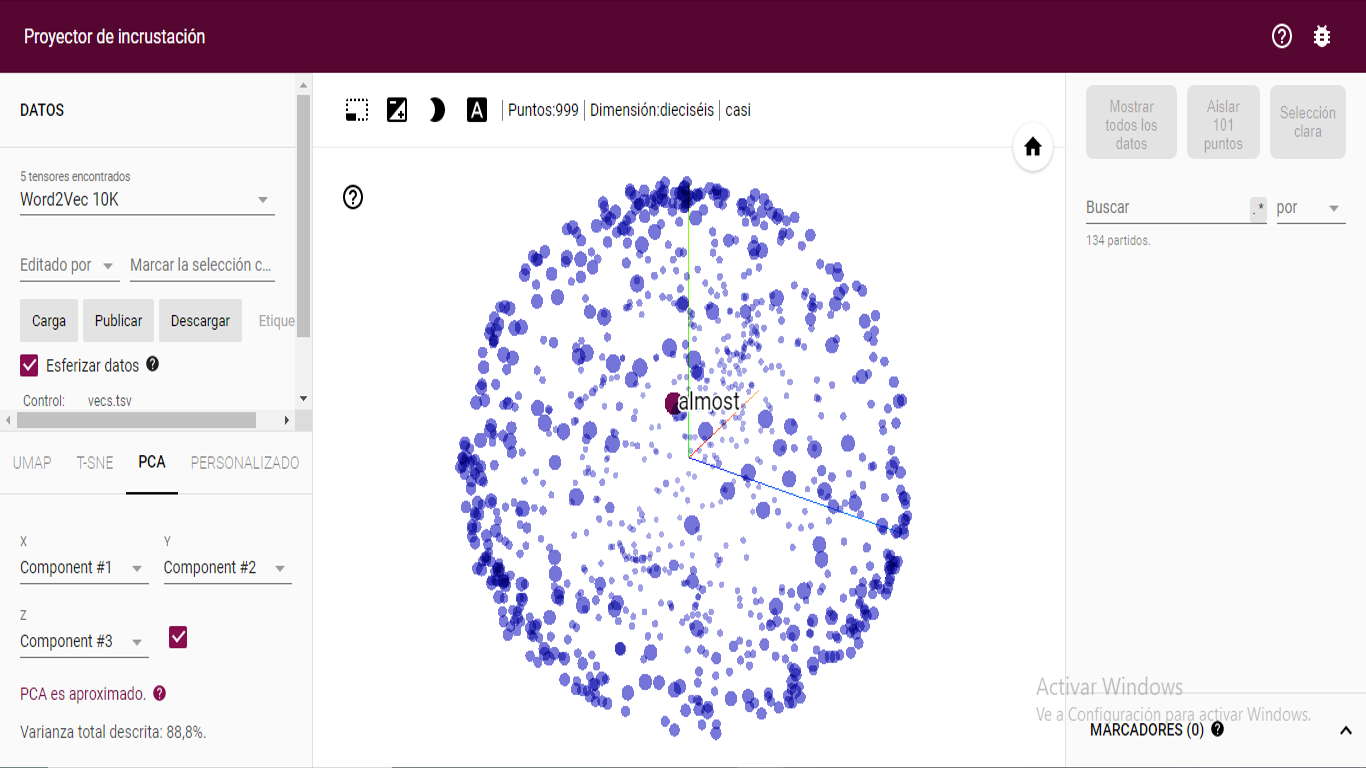

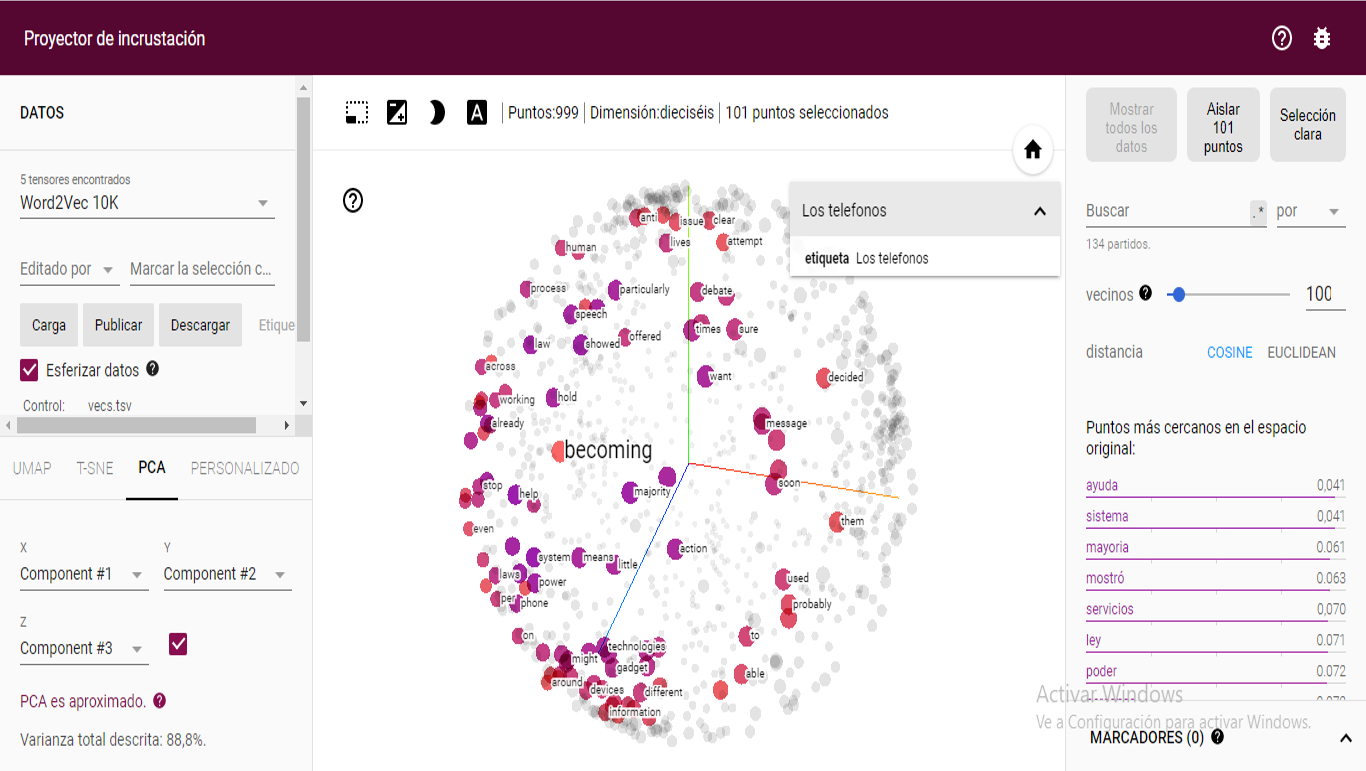